Importação de bibliotecas

In [1]:
import os
from ftplib import FTP
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

Estrutura de pastas

In [2]:
parent_dir = os.getcwd()

directories = ["data", "artifacts"]
for directory in directories:
    path = os.path.join(parent_dir, directory)
    try:
        os.mkdir(path)
    except FileExistsError:
        print("Directory already created!")
        
data_dir = os.path.join(parent_dir, directories[0])
artifacts_dir = os.path.join(parent_dir, directories[1])

Directory already created!
Directory already created!


Download de arquivos

In [3]:

ftp_server = "ftp.ibge.gov.br"
ftp_dir = "Censos/Censo_Demografico_2010/Resultados_do_Universo/"\
    "Agregados_por_Setores_Censitarios/"
user = "anonymous"
passwd = ""

ftp = FTP(ftp_server, user, passwd)
ftp.cwd(ftp_dir)
files = ftp.nlst()

docum = "Documentacao_Agregado"
UFs = ["SP", "PE" ]
files_check = [ filename for filename in os.listdir(data_dir) ]

for file in files:
        if (file.startswith(docum) or file[:2] in UFs) and (file not in files_check):
            with open(os.path.join(data_dir,file), 'wb') as fp:
                ftp.retrbinary('RETR ' + file, fp.write)
                print(file+" downloaded to "+data_dir)

ftp.quit()

'221 Goodbye.'

In [4]:
ftp_server = "geoftp.ibge.gov.br"
ftp_dir = "organizacao_do_territorio/malhas_territoriais/"\
    "malhas_de_setores_censitarios__divisoes_intramunicipais/censo_2010/"\
    "setores_censitarios_shp/"
user = "anonymous"
passwd = ""

ftp = FTP(ftp_server, user, passwd)
ftp.cwd(ftp_dir)

'250 Directory successfully changed.'

In [5]:
UFs_geo = ['pe', 'sp']
extension_geo = "_setores_censitarios.zip"
files_check = [ filename for filename in os.listdir(data_dir) ]

for UF_geo in UFs_geo:
    ftp.cwd(UF_geo)
    files = ftp.nlst()
    for file in files:
        if (file == UF_geo+extension_geo) and (file not in files_check):
            with open(os.path.join(data_dir,file), 'wb') as fp:
                ftp.retrbinary('RETR ' + file, fp.write)
                print(file+" downloaded to "+data_dir)
    ftp.cwd("..")
ftp.quit()

'221 Goodbye.'

In [6]:
ftp_server = "geoftp.ibge.gov.br"
ftp_dir = "organizacao_do_territorio/malhas_territoriais/"\
    "malhas_municipais/municipio_2010/"
user = "anonymous"
passwd = ""

ftp = FTP(ftp_server, user, passwd)
ftp.cwd(ftp_dir)

'250 Directory successfully changed.'

In [7]:
UFs_geo = ['pe', 'sp']
extension_geo = "_distritos.zip"
files_check = [ filename for filename in os.listdir(data_dir) ]

for UF_geo in UFs_geo:
    ftp.cwd(UF_geo)
    files = ftp.nlst()
    for file in files:
        if (file == UF_geo+extension_geo) and (file not in files_check):
            with open(os.path.join(data_dir,file), 'wb') as fp:
                ftp.retrbinary('RETR ' + file, fp.write)
                print(file+" downloaded to "+data_dir)
    ftp.cwd("..")
ftp.quit()

'221 Goodbye.'

In [8]:
ftp_server = "geoftp.ibge.gov.br"
ftp_dir = "organizacao_do_territorio/malhas_territoriais/"\
    "malhas_municipais/municipio_2010/"
user = "anonymous"
passwd = ""

ftp = FTP(ftp_server, user, passwd)
ftp.cwd(ftp_dir)

'250 Directory successfully changed.'

In [9]:
UFs_geo = ['pe', 'sp']
extension_geo = "_subdistritos.zip"
files_check = [ filename for filename in os.listdir(data_dir) ]

for UF_geo in UFs_geo:
    ftp.cwd(UF_geo)
    files = ftp.nlst()
    for file in files:
        if (file == UF_geo+extension_geo) and (file not in files_check):
            with open(os.path.join(data_dir,file), 'wb') as fp:
                ftp.retrbinary('RETR ' + file, fp.write)
                print(file+" downloaded to "+data_dir)
    ftp.cwd("..")
ftp.quit()

'221 Goodbye.'

Extração de arquivos

In [10]:
data_dir_files = os.listdir(data_dir)
data_dir_files

['Documentacao_Agregado_dos_Setores_2010_20231030',
 'Documentacao_Agregado_dos_Setores_2010_20231030.zip',
 'hotels_list.csv',
 'PE_20231030',
 'PE_20231030.zip',
 'pe_distritos',
 'pe_distritos.zip',
 'pe_setores_censitarios',
 'pe_setores_censitarios.zip',
 'pe_subdistritos',
 'pe_subdistritos.zip',
 'SP_Capital_20231030',
 'SP_Capital_20231030.zip',
 'sp_distritos',
 'sp_distritos.zip',
 'SP_Exceto_Capital_20231030',
 'SP_Exceto_Capital_20231030.zip',
 'sp_setores_censitarios',
 'sp_setores_censitarios.zip',
 'sp_subdistritos',
 'sp_subdistritos.zip']

In [11]:
for file in data_dir_files:
    try:
        if file.split(".")[1] == "zip":
            file_zipped = ZipFile(os.path.join(data_dir,file))
            
            new_folder_path = os.path.join(data_dir, file.split(".zip")[0])
            
            if not os.path.exists(new_folder_path):
                file_zipped.extractall(new_folder_path)
            
            file_zipped.close()
    except:
        print(f"{file} - Not a zipped file")

Documentacao_Agregado_dos_Setores_2010_20231030 - Not a zipped file
PE_20231030 - Not a zipped file
pe_distritos - Not a zipped file
pe_setores_censitarios - Not a zipped file
pe_subdistritos - Not a zipped file
SP_Capital_20231030 - Not a zipped file
sp_distritos - Not a zipped file
SP_Exceto_Capital_20231030 - Not a zipped file
sp_setores_censitarios - Not a zipped file
sp_subdistritos - Not a zipped file


In [12]:
files_list =[]

for dirpath, dirnames, filenames in os.walk(data_dir):
    for filename in filenames:
        file_path = os.path.join(dirpath, filename)
        files_list.append(file_path)
        
files_list

['c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\Documentacao_Agregado_dos_Setores_2010_20231030.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\hotels_list.csv',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\PE_20231030.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\pe_distritos.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\pe_setores_censitarios.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\pe_subdistritos.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\SP_Capital_20231030.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\sp_distritos.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\SP_Exceto_Capital_20231030.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\sp_setores_censitarios.zip',
 'c:\\Users\\guicr\\OneDrive\\Carreira\\Portfolio\\uber_2\\data\\sp_subdistritos.zi

Tratamento de dados

In [13]:
files_list_df =pd.DataFrame(files_list, columns=['filepaths'])
files_list_df

,filepaths
0,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
1,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
2,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
3,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
4,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
...,...
137,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
138,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
139,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...
140,c:\Users\guicr\OneDrive\Carreira\Portfolio\ube...


In [14]:
file_str_earning = 'Basico_' + 'SP1'
file_str_pop = 'pessoa13_' + 'sp1'

In [15]:
get_path_earning = files_list_df['filepaths'].str.contains(file_str_earning)
get_path_pop = files_list_df['filepaths'].str.contains(file_str_pop)

In [16]:
file_path_earning = files_list_df.loc[get_path_earning, 'filepaths'].values[0]
print(file_path_earning)
file_path_pop = files_list_df.loc[get_path_pop,'filepaths'].values[0]
print(file_path_pop)

c:\Users\guicr\OneDrive\Carreira\Portfolio\uber_2\data\SP_Capital_20231030\Base informaçoes setores2010 universo SP_Capital\CSV\Basico_SP1.csv
c:\Users\guicr\OneDrive\Carreira\Portfolio\uber_2\data\SP_Capital_20231030\Base informaçoes setores2010 universo SP_Capital\CSV\pessoa13_sp1.csv


In [17]:
city_earning = pd.read_csv(file_path_earning, encoding='iso-8859-1', sep=';')
city_earning.head().T

,0,1,2,3,4
Cod_setor,355030801000001,355030801000002,355030801000003,355030801000004,355030801000005
Cod_Grandes Regiões,3,3,3,3,3
Nome_Grande_Regiao,Região Sudeste,Região Sudeste,Região Sudeste,Região Sudeste,Região Sudeste
Cod_UF,35,35,35,35,35
Nome_da_UF,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo
Cod_meso,3515,3515,3515,3515,3515
Nome_da_meso,Metropolitana de São Paulo,Metropolitana de São Paulo,Metropolitana de São Paulo,Metropolitana de São Paulo,Metropolitana de São Paulo
Cod_micro,35061,35061,35061,35061,35061
Nome_da_micro,São Paulo,São Paulo,São Paulo,São Paulo,São Paulo
Cod_RM,20,20,20,20,20


In [18]:
city_earning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regiões  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

In [19]:
city_earning.isnull().sum()

Cod_setor                  0
Cod_Grandes Regiões        0
Nome_Grande_Regiao         0
Cod_UF                     0
Nome_da_UF                 0
Cod_meso                   0
Nome_da_meso               0
Cod_micro                  0
Nome_da_micro              0
Cod_RM                     0
Nome_da_RM                 0
Cod_municipio              0
Nome_do_municipio          0
Cod_distrito               0
Nome_do_distrito           0
Cod_subdistrito            0
Nome_do_subdistrito        0
Cod_bairro                 0
Nome_do_bairro             0
Situacao_setor             0
V001                      30
V002                      30
V003                      30
V004                      30
V005                      30
V006                      30
V007                      39
V008                      39
V009                       0
V010                       0
V011                      11
V012                      11
Unnamed: 32            18363
dtype: int64

In [20]:
stg_city_earning = city_earning[['Cod_setor','Nome_do_municipio','Nome_do_distrito','Nome_do_bairro', 'V009']].reset_index(drop=True).copy()
stg_city_earning.head()

,Cod_setor,Nome_do_municipio,Nome_do_distrito,Nome_do_bairro,V009
0,355030801000001,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"1227,41"
1,355030801000002,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"1045,78"
2,355030801000003,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"902,97"
3,355030801000004,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"869,09"
4,355030801000005,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"917,71"


In [21]:
stg_city_earning['Nome_do_municipio'].unique()

array(['SÃO PAULO'], dtype=object)

In [22]:
city_pop = pd.read_csv(file_path_pop, encoding='iso-8859-1', sep=';')
city_pop.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,...,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134
0,355030801000001,1,806,800,268,155,164,79,12,10,...,0,0,0,0,0,1,0,1,0,0
1,355030801000002,1,913,913,306,186,228,78,14,10,...,3,0,0,1,0,0,0,0,0,0
2,355030801000003,1,625,625,189,111,41,146,0,11,...,2,0,0,0,0,0,0,0,0,0
3,355030801000004,1,572,572,181,101,121,84,4,6,...,0,1,1,1,1,0,0,0,0,1
4,355030801000005,1,754,754,240,140,178,94,3,9,...,0,2,0,0,0,0,0,0,0,1


In [23]:
city_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Columns: 136 entries, Cod_setor to V134
dtypes: int64(3), object(133)
memory usage: 19.1+ MB


In [24]:
city_pop.isnull().sum()

Cod_setor         0
Situacao_setor    0
V001              0
V002              0
V003              0
                 ..
V130              0
V131              0
V132              0
V133              0
V134              0
Length: 136, dtype: int64

In [25]:
null_values = city_pop.isnull().sum()
null_values[null_values >= 1]

Series([], dtype: int64)

In [26]:
stg_city_pop = city_pop[['Cod_setor','V001']].reset_index(drop=True).copy()

In [27]:
stg_city_earning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cod_setor          18363 non-null  int64 
 1   Nome_do_municipio  18363 non-null  object
 2   Nome_do_distrito   18363 non-null  object
 3   Nome_do_bairro     18363 non-null  object
 4   V009               18363 non-null  object
dtypes: int64(1), object(4)
memory usage: 717.4+ KB


In [28]:
stg_city_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Cod_setor  18363 non-null  int64
 1   V001       18363 non-null  int64
dtypes: int64(2)
memory usage: 287.0 KB


In [29]:
stg_city_pop['Cod_setor'] = stg_city_pop['Cod_setor'].astype('str')
stg_city_earning['Cod_setor'] = stg_city_earning['Cod_setor'].astype('str')

In [30]:
stg_city = pd.merge(stg_city_earning, stg_city_pop, on='Cod_setor')
stg_city.head()

,Cod_setor,Nome_do_municipio,Nome_do_distrito,Nome_do_bairro,V009,V001
0,355030801000001,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"1227,41",806
1,355030801000002,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"1045,78",913
2,355030801000003,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"902,97",625
3,355030801000004,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"869,09",572
4,355030801000005,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),"917,71",754


In [31]:
stg_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cod_setor          18363 non-null  object
 1   Nome_do_municipio  18363 non-null  object
 2   Nome_do_distrito   18363 non-null  object
 3   Nome_do_bairro     18363 non-null  object
 4   V009               18363 non-null  object
 5   V001               18363 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 860.9+ KB


In [32]:
stg_city['V009'] = stg_city['V009'].str.replace(",", ".")
stg_city.head(10)

,Cod_setor,Nome_do_municipio,Nome_do_distrito,Nome_do_bairro,V009,V001
0,355030801000001,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),1227.41,806
1,355030801000002,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),1045.78,913
2,355030801000003,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),902.97,625
3,355030801000004,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),869.09,572
4,355030801000005,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),917.71,754
5,355030801000006,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),878.94,643
6,355030801000007,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),717.13,690
7,355030801000008,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),686.94,755
8,355030801000009,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),1006.66,693
9,355030801000010,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),1293.43,676


In [33]:
stg_city['V009'] = stg_city['V009'].astype('float64')

In [34]:
stg_city.rename(columns={'V001':'pop', 'V009':'renda'}, inplace=True)

In [35]:
stg_city.head()

,Cod_setor,Nome_do_municipio,Nome_do_distrito,Nome_do_bairro,renda,pop
0,355030801000001,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),1227.41,806
1,355030801000002,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),1045.78,913
2,355030801000003,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),902.97,625
3,355030801000004,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),869.09,572
4,355030801000005,SÃO PAULO,ÁGUA RASA,SÃO PAULO (todos os setores),917.71,754


In [36]:
mask = stg_city['Nome_do_municipio'].str.contains("SÃO PAULO")
stg_city = stg_city[mask].copy()

In [37]:
stg_city.head().T

,0,1,2,3,4
Cod_setor,355030801000001,355030801000002,355030801000003,355030801000004,355030801000005
Nome_do_municipio,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
Nome_do_distrito,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA
Nome_do_bairro,SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores)
renda,1227.41,1045.78,902.97,869.09,917.71
pop,806,913,625,572,754


In [38]:
stg_city['Nome_do_distrito'].unique()

array(['ÁGUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BELÉM', 'BOM RETIRO',
       'BRÁS', 'BRASILÂNDIA', 'BUTANTÃ', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAPÃO REDONDO', 'CARRÃO', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLAÇÃO',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO Ó', 'GRAJAÚ',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JAÇANÃ', 'JAGUARA',
       'JAGUARÉ', 'JARAGUÁ', 'JARDIM ÂNGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM SÃO LUÍS', 'JOSÉ BONIFÁCIO', 'LAPA',
       'LIBERDADE', 'LIMÃO', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REPÚBLICA

Tratamento de dados geográficos

In [39]:
file_str_geo = '35SEE250GC_SIR.shp'
get_path_geo = files_list_df['filepaths'].str.contains(file_str_geo)
file_path_geo = files_list_df.loc[get_path_geo, 'filepaths'].values[0]
print(file_path_geo)

c:\Users\guicr\OneDrive\Carreira\Portfolio\uber_2\data\sp_setores_censitarios\35SEE250GC_SIR.shp


In [40]:
cities_setores_censitarios = gpd.read_file(file_path_geo)

In [41]:
cities_setores_censitarios.head().T

,0,1,2,3,4
ID,98237.0,98232.0,98230.0,98229.0,98231.0
CD_GEOCODI,354100005000009,354100005000004,354100005000002,354100005000001,354100005000003
TIPO,URBANO,URBANO,URBANO,URBANO,URBANO
CD_GEOCODS,35410000500,35410000500,35410000500,35410000500,35410000500
NM_SUBDIST,None,None,None,None,None
CD_GEOCODD,354100005,354100005,354100005,354100005,354100005
NM_DISTRIT,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE
CD_GEOCODM,3541000,3541000,3541000,3541000,3541000
NM_MUNICIP,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE
NM_MICRO,SANTOS,SANTOS,SANTOS,SANTOS,SANTOS


In [42]:
stg_cities_setores_censitarios = cities_setores_censitarios.copy()

In [43]:
stg_cities_setores_censitarios.head(10).T

,0,1,2,3,4,5,6,7,8,9
ID,98237.0,98232.0,98230.0,98229.0,98231.0,98233.0,98236.0,98242.0,98239.0,98238.0
CD_GEOCODI,354100005000009,354100005000004,354100005000002,354100005000001,354100005000003,354100005000005,354100005000008,354100005000014,354100005000011,354100005000010
TIPO,URBANO,URBANO,URBANO,URBANO,URBANO,URBANO,URBANO,URBANO,URBANO,URBANO
CD_GEOCODS,35410000500,35410000500,35410000500,35410000500,35410000500,35410000500,35410000500,35410000500,35410000500,35410000500
NM_SUBDIST,None,None,None,None,None,None,None,None,None,None
CD_GEOCODD,354100005,354100005,354100005,354100005,354100005,354100005,354100005,354100005,354100005,354100005
NM_DISTRIT,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE
CD_GEOCODM,3541000,3541000,3541000,3541000,3541000,3541000,3541000,3541000,3541000,3541000
NM_MUNICIP,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE,PRAIA GRANDE
NM_MICRO,SANTOS,SANTOS,SANTOS,SANTOS,SANTOS,SANTOS,SANTOS,SANTOS,SANTOS,SANTOS


In [44]:
stg_cities_setores_censitarios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68296 entries, 0 to 68295
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          68296 non-null  float64 
 1   CD_GEOCODI  68296 non-null  object  
 2   TIPO        68296 non-null  object  
 3   CD_GEOCODS  68296 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  68296 non-null  object  
 6   NM_DISTRIT  68296 non-null  object  
 7   CD_GEOCODM  68296 non-null  object  
 8   NM_MUNICIP  68296 non-null  object  
 9   NM_MICRO    68296 non-null  object  
 10  NM_MESO     68296 non-null  object  
 11  CD_GEOCODB  18797 non-null  object  
 12  NM_BAIRRO   18797 non-null  object  
 13  ID1         68296 non-null  int64   
 14  geometry    68296 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 7.8+ MB


In [45]:
stg_cities_setores_censitarios.isnull().sum()

ID                0
CD_GEOCODI        0
TIPO              0
CD_GEOCODS        0
NM_SUBDIST    68296
CD_GEOCODD        0
NM_DISTRIT        0
CD_GEOCODM        0
NM_MUNICIP        0
NM_MICRO          0
NM_MESO           0
CD_GEOCODB    49499
NM_BAIRRO     49499
ID1               0
geometry          0
dtype: int64

In [46]:
stg_cities_setores_censitarios['NM_MUNICIP'].unique()

array(['PRAIA GRANDE', 'ARAÇATUBA', 'ATIBAIA', 'ADAMANTINA', 'ADOLFO',
       'AGUAÍ', 'ÁGUAS DA PRATA', 'ÁGUAS DE LINDÓIA',
       'ÁGUAS DE SANTA BÁRBARA', 'ÁGUAS DE SÃO PEDRO', 'AGUDOS',
       'ALAMBARI', 'ALFREDO MARCONDES', 'ALTAIR', 'ALTINÓPOLIS',
       'ALTO ALEGRE', 'ALUMÍNIO', 'ÁLVARES FLORENCE', 'ÁLVARES MACHADO',
       'ÁLVARO DE CARVALHO', 'ALVINLÂNDIA', 'AMERICANA',
       'AMÉRICO BRASILIENSE', 'AMÉRICO DE CAMPOS', 'AMPARO', 'ANALÂNDIA',
       'ANDRADINA', 'ANGATUBA', 'ANHEMBI', 'ANHUMAS', 'APARECIDA',
       "APARECIDA D'OESTE", 'APIAÍ', 'ARAÇARIGUAMA', 'ARAÇOIABA DA SERRA',
       'ARAMINA', 'ARANDU', 'ARAPEÍ', 'ARARAQUARA', 'ARARAS', 'ARCO-ÍRIS',
       'AREALVA', 'AREIAS', 'AREIÓPOLIS', 'ARIRANHA', 'ARTUR NOGUEIRA',
       'ARUJÁ', 'ASPÁSIA', 'ASSIS', 'AURIFLAMA', 'AVAÍ', 'AVANHANDAVA',
       'AVARÉ', 'BADY BASSITT', 'BALBINOS', 'BÁLSAMO', 'BANANAL',
       'BARÃO DE ANTONINA', 'BARBOSA', 'BARIRI', 'BARRA BONITA',
       'BARRA DO CHAPÉU', 'BARRA DO TURVO', 'BARR

In [47]:
mask = stg_cities_setores_censitarios['NM_MUNICIP'].str.contains('SÃO PAULO', case=False)
stg_city_setores_censitarios = stg_cities_setores_censitarios[mask].reset_index(drop=True).copy()
stg_city_setores_censitarios.head().T

,0,1,2,3,4
ID,109347.0,109348.0,109349.0,109350.0,109351.0
CD_GEOCODI,355030804000079,355030804000080,355030804000081,355030804000082,355030804000083
TIPO,URBANO,URBANO,URBANO,URBANO,URBANO
CD_GEOCODS,35503080400,35503080400,35503080400,35503080400,35503080400
NM_SUBDIST,None,None,None,None,None
CD_GEOCODD,355030804,355030804,355030804,355030804,355030804
NM_DISTRIT,ARICANDUVA,ARICANDUVA,ARICANDUVA,ARICANDUVA,ARICANDUVA
CD_GEOCODM,3550308,3550308,3550308,3550308,3550308
NM_MUNICIP,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
NM_MICRO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO


In [48]:
stg_city_setores_censitarios.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18953 entries, 0 to 18952
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          18953 non-null  float64 
 1   CD_GEOCODI  18953 non-null  object  
 2   TIPO        18953 non-null  object  
 3   CD_GEOCODS  18953 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  18953 non-null  object  
 6   NM_DISTRIT  18953 non-null  object  
 7   CD_GEOCODM  18953 non-null  object  
 8   NM_MUNICIP  18953 non-null  object  
 9   NM_MICRO    18953 non-null  object  
 10  NM_MESO     18953 non-null  object  
 11  CD_GEOCODB  0 non-null      object  
 12  NM_BAIRRO   0 non-null      object  
 13  ID1         18953 non-null  int64   
 14  geometry    18953 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 2.2+ MB


In [49]:
stg_city_setores_censitarios.rename(columns={'CD_GEOCODI':'Cod_setor'}, inplace=True)
stg_city_setores_censitarios.head().T

,0,1,2,3,4
ID,109347.0,109348.0,109349.0,109350.0,109351.0
Cod_setor,355030804000079,355030804000080,355030804000081,355030804000082,355030804000083
TIPO,URBANO,URBANO,URBANO,URBANO,URBANO
CD_GEOCODS,35503080400,35503080400,35503080400,35503080400,35503080400
NM_SUBDIST,None,None,None,None,None
CD_GEOCODD,355030804,355030804,355030804,355030804,355030804
NM_DISTRIT,ARICANDUVA,ARICANDUVA,ARICANDUVA,ARICANDUVA,ARICANDUVA
CD_GEOCODM,3550308,3550308,3550308,3550308,3550308
NM_MUNICIP,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
NM_MICRO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO


In [50]:
stg_city_setores_censitarios = stg_city_setores_censitarios.to_crs(epsg=31983)
stg_city_setores_censitarios['geometry'].head()

0    POLYGON ((345114.562 7391509.505, 345106.759 7...
1    POLYGON ((345002.927 7391486.947, 344983.085 7...
2    POLYGON ((344874.928 7391332.868, 344864.237 7...
3    POLYGON ((344746.124 7391456.534, 344742.477 7...
4    POLYGON ((344512.429 7391240.196, 344500.243 7...
Name: geometry, dtype: geometry

In [51]:
stg_city_setores_censitarios['area_ha'] = stg_city_setores_censitarios['geometry'].area / 1e4

In [52]:
stg_city_setores_censitarios = stg_city_setores_censitarios.to_crs(epsg=4326)

In [53]:
stg_city_setores_censitarios.head().T

,0,1,2,3,4
ID,109347.0,109348.0,109349.0,109350.0,109351.0
Cod_setor,355030804000079,355030804000080,355030804000081,355030804000082,355030804000083
TIPO,URBANO,URBANO,URBANO,URBANO,URBANO
CD_GEOCODS,35503080400,35503080400,35503080400,35503080400,35503080400
NM_SUBDIST,None,None,None,None,None
CD_GEOCODD,355030804,355030804,355030804,355030804,355030804
NM_DISTRIT,ARICANDUVA,ARICANDUVA,ARICANDUVA,ARICANDUVA,ARICANDUVA
CD_GEOCODM,3550308,3550308,3550308,3550308,3550308
NM_MUNICIP,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
NM_MICRO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO


In [54]:
stg_city_setores_censitarios['Cod_setor'] = stg_city_setores_censitarios['Cod_setor'].astype('str')

Exploração de dados

In [55]:
stg_city_setores_censitarios['Cod_setor']

0        355030804000079
1        355030804000080
2        355030804000081
3        355030804000082
4        355030804000083
              ...       
18948    355030896000243
18949    355030896000244
18950    355030896000245
18951    355030896000246
18952    355030896000247
Name: Cod_setor, Length: 18953, dtype: object

In [56]:
stg_city['Cod_setor']

0        355030801000001
1        355030801000002
2        355030801000003
3        355030801000004
4        355030801000005
              ...       
18358    355030896000243
18359    355030896000244
18360    355030896000245
18361    355030896000246
18362    355030896000247
Name: Cod_setor, Length: 18363, dtype: object

In [57]:
diff_in_series = set(stg_city_setores_censitarios['Cod_setor']).difference(stg_city['Cod_setor'])
diff_in_series

{'355030802000032',
 '355030803000062',
 '355030803000063',
 '355030803000064',
 '355030803000065',
 '355030803000068',
 '355030803000069',
 '355030803000072',
 '355030803000075',
 '355030803000081',
 '355030803000092',
 '355030803000099',
 '355030803000108',
 '355030803000109',
 '355030803000110',
 '355030804000058',
 '355030804000126',
 '355030805000150',
 '355030806000031',
 '355030806000032',
 '355030806000033',
 '355030806000034',
 '355030806000036',
 '355030807000122',
 '355030808000074',
 '355030811000170',
 '355030811000214',
 '355030811000216',
 '355030811000254',
 '355030811000264',
 '355030811000267',
 '355030811000268',
 '355030811000269',
 '355030811000270',
 '355030811000328',
 '355030811000330',
 '355030811000332',
 '355030811000337',
 '355030811000340',
 '355030811000342',
 '355030811000347',
 '355030811000348',
 '355030811000349',
 '355030811000351',
 '355030811000353',
 '355030813000019',
 '355030813000041',
 '355030813000171',
 '355030813000173',
 '355030813000177',


In [58]:
stg_city_setores_censitarios[stg_city_setores_censitarios['Cod_setor'].str.contains('355030803000065')]

,ID,Cod_setor,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,area_ha
316,109212.0,355030803000065,RURAL,35503080300,None,355030803,ANHANGUERA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,43674,"POLYGON ((-46.79531 -23.42576, -46.79545 -23.4...",5.759459


In [59]:
stg_city.head().T

,0,1,2,3,4
Cod_setor,355030801000001,355030801000002,355030801000003,355030801000004,355030801000005
Nome_do_municipio,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
Nome_do_distrito,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA
Nome_do_bairro,SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores)
renda,1227.41,1045.78,902.97,869.09,917.71
pop,806,913,625,572,754


In [60]:
stg_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cod_setor          18363 non-null  object 
 1   Nome_do_municipio  18363 non-null  object 
 2   Nome_do_distrito   18363 non-null  object 
 3   Nome_do_bairro     18363 non-null  object 
 4   renda              18363 non-null  float64
 5   pop                18363 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 860.9+ KB


In [61]:
stg_city.describe()

,renda,pop
count,18363.000000,18363.000000
mean,1413.447912,612.835757
std,1515.485910,314.424174
min,0.000000,1.000000
25%,549.415000,408.000000
50%,817.350000,584.000000
75%,1619.335000,779.000000
max,30825.930000,3252.000000


stg_city[stg_city['Nome_do_distrito'].str.contains('ANHANGUERA')][60:70]

stg_city_setores_censitarios[stg_city_setores_censitarios['NM_DISTRIT'].str.contains('ANHANGUERA')][70:80].T

In [62]:
stg1_city_setores_censitarios = stg_city_setores_censitarios[['Cod_setor', 'geometry', 'area_ha']].copy()

In [63]:
stg1_city_setores_censitarios.head().T

,0,1,2,3,4
Cod_setor,355030804000079,355030804000080,355030804000081,355030804000082,355030804000083
geometry,"POLYGON ((-46.517785 -23.57947399999999, -46.5...","POLYGON ((-46.518881 -23.579667, -46.519082 -2...","POLYGON ((-46.520151 -23.581046, -46.52026 -23...","POLYGON ((-46.5214 -23.57991699999999, -46.521...","POLYGON ((-46.523712 -23.581848, -46.523838 -2..."
area_ha,3.585513,3.630654,2.226977,3.671732,2.914846


In [64]:
stg_city = pd.merge(stg_city, stg1_city_setores_censitarios, on='Cod_setor')

In [65]:
stg_city.head().T

,0,1,2,3,4
Cod_setor,355030801000001,355030801000002,355030801000003,355030801000004,355030801000005
Nome_do_municipio,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
Nome_do_distrito,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA
Nome_do_bairro,SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores)
renda,1227.41,1045.78,902.97,869.09,917.71
pop,806,913,625,572,754
geometry,"POLYGON ((-46.569514 -23.569163, -46.570051 -2...","POLYGON ((-46.568704 -23.56853199999999, -46.5...","POLYGON ((-46.568557 -23.56965199999999, -46.5...",POLYGON ((-46.56935668536443 -23.5730222216808...,"POLYGON ((-46.572295 -23.569816, -46.569495 -2..."
area_ha,7.213308,7.162393,5.596828,6.840022,8.228113


In [66]:
stg_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Cod_setor          18363 non-null  object  
 1   Nome_do_municipio  18363 non-null  object  
 2   Nome_do_distrito   18363 non-null  object  
 3   Nome_do_bairro     18363 non-null  object  
 4   renda              18363 non-null  float64 
 5   pop                18363 non-null  int64   
 6   geometry           18363 non-null  geometry
 7   area_ha            18363 non-null  float64 
dtypes: float64(2), geometry(1), int64(1), object(4)
memory usage: 1.1+ MB


In [67]:
stg_city.isnull().sum()

Cod_setor            0
Nome_do_municipio    0
Nome_do_distrito     0
Nome_do_bairro       0
renda                0
pop                  0
geometry             0
area_ha              0
dtype: int64

In [68]:
stg_city['dens_pop'] = stg_city['pop'] / stg_city['area_ha']

In [69]:
stg_city.head().T

,0,1,2,3,4
Cod_setor,355030801000001,355030801000002,355030801000003,355030801000004,355030801000005
Nome_do_municipio,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
Nome_do_distrito,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA
Nome_do_bairro,SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores)
renda,1227.41,1045.78,902.97,869.09,917.71
pop,806,913,625,572,754
geometry,"POLYGON ((-46.569514 -23.569163, -46.570051 -2...","POLYGON ((-46.568704 -23.56853199999999, -46.5...","POLYGON ((-46.568557 -23.56965199999999, -46.5...",POLYGON ((-46.56935668536443 -23.5730222216808...,"POLYGON ((-46.572295 -23.569816, -46.569495 -2..."
area_ha,7.213308,7.162393,5.596828,6.840022,8.228113
dens_pop,111.737912,127.471356,111.670402,83.625464,91.637055


In [71]:
bairros =  stg_city.groupby('Nome_do_distrito').agg({'renda':'mean', 'pop':'sum', 'area_ha':'sum'})
bairros['dens_pop'] = bairros['pop'] / bairros['area_ha']
bairros

,renda,pop,area_ha,dens_pop
Nome_do_distrito,,,,
ALTO DE PINHEIROS,4309.551667,43117,749.247266,57.547090
ANHANGUERA,600.476636,65859,3181.427584,20.701084
ARICANDUVA,883.293952,89622,683.234317,131.173154
ARTUR ALVIM,853.139060,105269,649.518699,162.072316
BARRA FUNDA,2744.018437,14383,587.602036,24.477451
...,...,...,...,...
VILA MATILDE,1119.363265,104947,889.669893,117.961730
VILA MEDEIROS,816.221493,129919,787.467442,164.983329
VILA PRUDENTE,1403.888882,104242,957.017784,108.923786


In [72]:
bairros.describe()

,renda,pop,area_ha,dens_pop
count,96.000000,96.000000,96.000000,96.000000
mean,1576.818001,117223.989583,1439.734737,114.073973
std,1210.528426,69639.133760,2413.708473,51.599390
min,396.483333,8258.000000,210.434312,0.408507
25%,712.579332,69368.000000,738.198825,79.473982
50%,1104.387729,104594.500000,952.485476,109.752988
75%,2090.890415,142353.250000,1285.874277,144.322484
max,5402.808125,360787.000000,20215.054009,251.771993


In [79]:
q3_bairros_renda = bairros['renda'].quantile(0.75)
print(q3_bairros_renda)

q1_bairros_dens = bairros['dens_pop'].quantile(0.25)
print(q1_bairros_dens)

mask = (bairros['renda']>=q3_bairros_renda) & (bairros['dens_pop']>=q1_bairros_dens)

bairros[mask].sort_values('renda', ascending=False)

2090.8904145902547
79.47398196154025


,renda,pop,area_ha,dens_pop
Nome_do_distrito,,,,
MOEMA,5335.615852,83368,909.058712,91.708048
JARDIM PAULISTA,4977.404299,88692,624.875336,141.935511
ITAIM BIBI,4571.385797,92570,1002.178038,92.368817
VILA MARIANA,3927.155844,130484,852.239713,153.107157
CONSOLAÇÃO,3885.162966,57365,374.444110,153.200434
PERDIZES,3652.208716,111161,631.559012,176.010472
VILA ANDRADE,3647.496409,127015,1024.910417,123.927904
BELA VISTA,2777.620141,69460,275.884538,251.771993
SAÚDE,2767.328437,130780,923.632757,141.593073


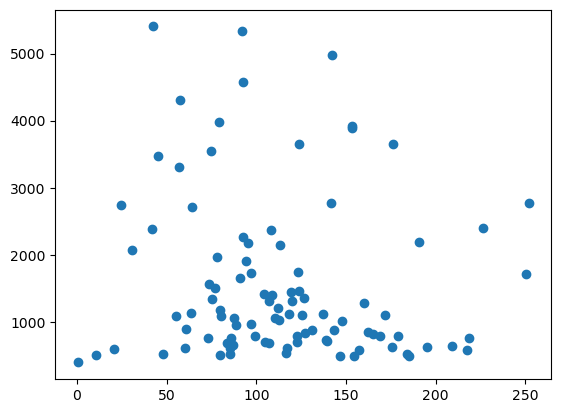

In [75]:
plt.scatter(bairros['dens_pop'], bairros['renda'])

plt.show()

Visualização de dados

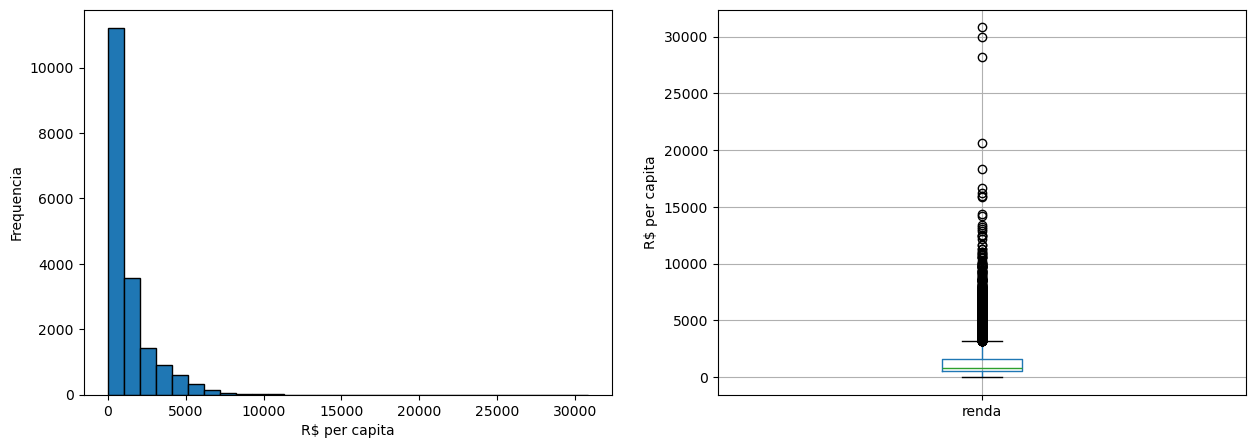

In [80]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(stg_city['renda'], bins=30, edgecolor='k')
plt.xlabel('R$ per capita')
plt.ylabel('Frequencia')

plt.subplot(1,2,2)
stg_city.boxplot(column='renda')
plt.ylabel('R$ per capita')

plt.show()

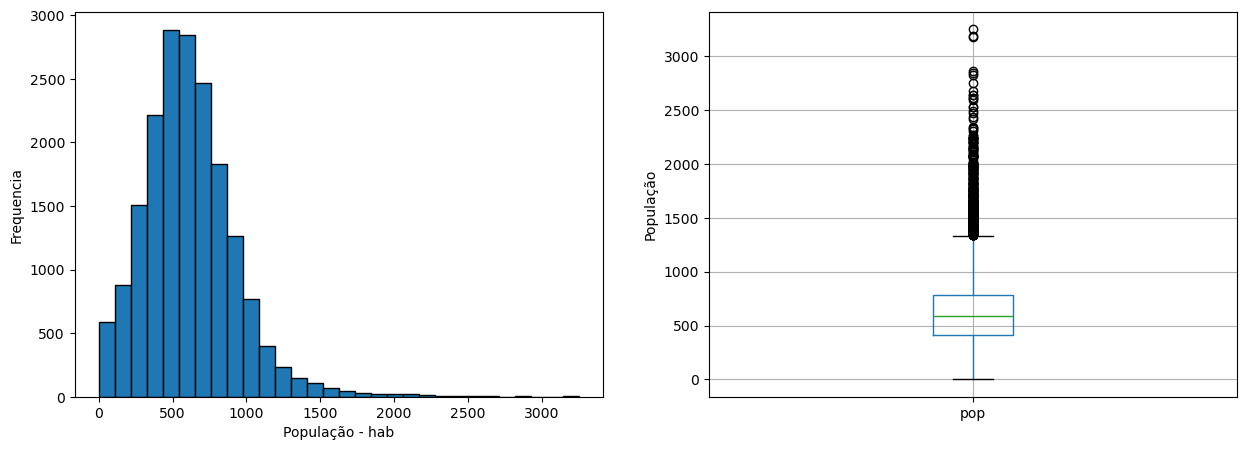

In [230]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(stg_city['pop'], bins=30, edgecolor='k')
plt.xlabel('População - hab')
plt.ylabel('Frequencia')

plt.subplot(1,2,2)
stg_city.boxplot(column='pop')
plt.ylabel('População')

plt.show()

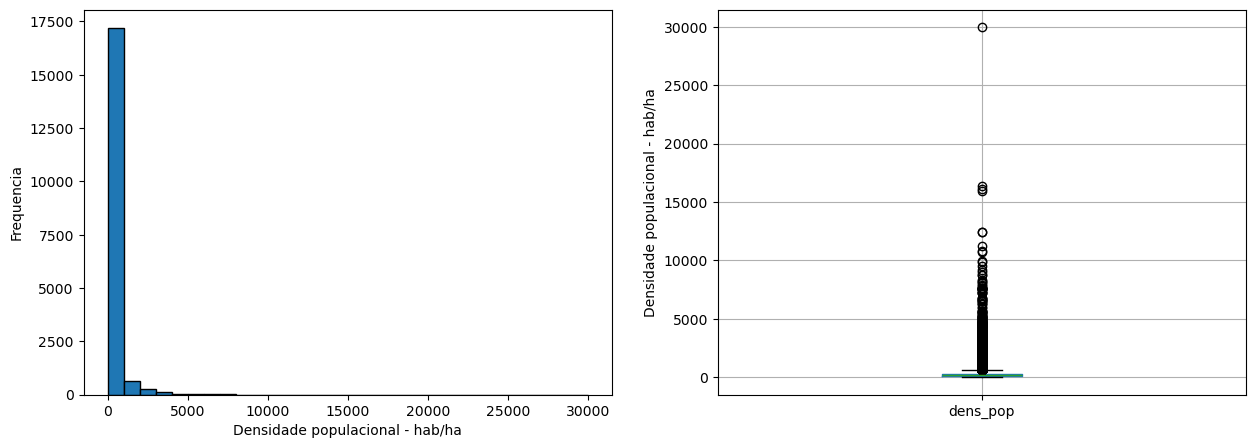

In [232]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(stg_city['dens_pop'], bins=30, edgecolor='k')
plt.xlabel('Densidade populacional - hab/ha')
plt.ylabel('Frequencia')

plt.subplot(1,2,2)
stg_city.boxplot(column='dens_pop')
plt.ylabel('Densidade populacional - hab/ha')

plt.show()

In [233]:
stg_city.describe()

,renda,pop,area_ha,dens_pop
count,18363.000000,18363.000000,18363.000000,18363.000000
mean,1413.447912,612.835757,7.526795,346.083629
std,1515.485910,314.424174,58.056000,723.939301
min,0.000000,1.000000,0.027155,0.006458
25%,549.415000,408.000000,1.790199,106.570373
50%,817.350000,584.000000,3.462536,173.801327
75%,1619.335000,779.000000,5.737164,295.597067
max,30825.930000,3252.000000,4701.142369,29976.607758


In [89]:
q3_renda = stg_city['renda'].quantile(0.75)
q3_dens_pop = stg_city['dens_pop'].quantile(0.50)

mask = (stg_city['renda'] >= q3_renda) & (stg_city['dens_pop'] >= q3_dens_pop)
top_25_stg_city = stg_city[mask].copy()
top_25_stg_city.head().T

,12,40,55,60,61
Cod_setor,355030801000013,355030801000041,355030801000056,355030801000061,355030801000062
Nome_do_municipio,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO,SÃO PAULO
Nome_do_distrito,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA,ÁGUA RASA
Nome_do_bairro,SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores),SÃO PAULO (todos os setores)
renda,1945.66,1806.04,1765.4,2267.09,3442.4
pop,615,923,546,366,1327
geometry,"POLYGON ((-46.566156 -23.56605, -46.56625 -23....","POLYGON ((-46.563947 -23.57384399999999, -46.5...","POLYGON ((-46.578439 -23.561122, -46.578656 -2...","POLYGON ((-46.56871 -23.561029, -46.569764 -23...","POLYGON ((-46.567692 -23.560672, -46.567774 -2..."
area_ha,2.170121,2.930764,2.973625,2.001628,7.550349
dens_pop,283.394354,314.934907,183.614271,182.851171,175.753466


In [90]:
top_25_stg_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2455 entries, 12 to 18087
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Cod_setor          2455 non-null   object  
 1   Nome_do_municipio  2455 non-null   object  
 2   Nome_do_distrito   2455 non-null   object  
 3   Nome_do_bairro     2455 non-null   object  
 4   renda              2455 non-null   float64 
 5   pop                2455 non-null   int64   
 6   geometry           2455 non-null   geometry
 7   area_ha            2455 non-null   float64 
 8   dens_pop           2455 non-null   float64 
dtypes: float64(3), geometry(1), int64(1), object(4)
memory usage: 191.8+ KB


In [91]:
top_25_stg_city.describe()

,renda,pop,area_ha,dens_pop
count,2455.000000,2455.000000,2455.000000,2455.000000
mean,3587.649874,508.900611,1.313328,871.482487
std,1724.969536,233.188427,1.175390,1053.631585
min,1619.480000,24.000000,0.045374,174.010533
25%,2297.005000,343.500000,0.333687,264.829870
50%,3224.230000,481.000000,1.054822,428.277134
75%,4457.090000,629.000000,1.926321,1105.420314
max,28234.640000,2011.000000,9.373205,16334.957566


Visualização geográfica

file_str_geo = '35DSE250GC_SIR.shp'
get_path_geo = files_list_df['filepaths'].str.contains(file_str_geo)
file_path_geo = files_list_df.loc[get_path_geo, 'filepaths'].values[0]
print(file_path_geo)

cities_distritos = gpd.read_file(file_path_geo)

cities_distritos.head().T

cities_distritos.info()

cities_distritos[cities_distritos['CD_GEOCODD'].str.contains('355030804')]['geometry']

In [92]:
top_25_stg_city_gdf = gpd.GeoDataFrame(top_25_stg_city, geometry='geometry')

In [93]:
hotels_list_path = os.path.join(data_dir, 'hotels_list.csv')

hotels_list_df = pd.read_csv(hotels_list_path)

hotels_list_df

,name,address,user_rating,latitude,longitude
0,Mercure Sao Paulo Paulista,"R. São Carlos do Pinhal, 87 - Bela Vista, São ...",4.5,-23.566081,-46.649226
1,Transamerica Executive Paulista,"R. São Carlos do Pinhal, 200 - Bela Vista, São...",4.5,-23.565089,-46.649650
2,Hotel Cadoro - Ca'd'Oro São Paulo,"R. Augusta, 129 - Consolação, São Paulo - SP, ...",4.7,-23.550615,-46.647274
3,Mercure Sao Paulo Bela Vista,"R. Maestro Cardim, 407 - Paraíso, São Paulo - ...",4.4,-23.564791,-46.641125
4,Mercure São Paulo Grand Plaza Paulista Hotel,"R. Leôncio de Carvalho, 201 - Paraíso, São Pau...",4.2,-23.571916,-46.646746
5,Quality Paulista São Paulo Jardim,"Alameda Lorena, 360 - Jardim Paulista, São Pau...",4.3,-23.571202,-46.657743
6,Wyndham Sao Paulo Paulista,"Alameda Campinas, 540 - Jardim Paulista, São P...",3.8,-23.566178,-46.653650
7,Hilton Garden Inn Rebouças,"Av. Rebouças, 2636 - Pinheiros, São Paulo - SP...",4.6,-23.567923,-46.685264
8,Blue Tree Premium Paulista,"Rua Peixoto Gomide, 707 - Cerqueira César, São...",4.6,-23.560153,-46.656107
9,Nikkey Palace Hotel,"R. Galvão Bueno, 425 - Liberdade, São Paulo - ...",4.4,-23.559463,-46.634707


In [94]:
map = folium.Map(location=[-23.5633, -46.66744],
                 tiles='Cartodb Positron',
                 zoom_start=13)

borders_style = {
    'color': 'green',
    'weight': 1,
    'fillColor': 'green',
    'fillOpacity': 0.15,
}

top_25 = folium.GeoJson(data=top_25_stg_city_gdf,
                             name='Top 25% renda e densidade populacional',
                             style_function=lambda x: borders_style,
                             )

top_25.add_to(map)

for index, row in hotels_list_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
    ).add_to(map)

map_dir = os.path.join(artifacts_dir, "top_25_sao_paulo.html")

map.save(map_dir)